# Kannada MNIST Data - Modeling, Interpreting, Visualization, Model understanding  


The Kannada MNIST dataset is a great recent work ([details here](https://arxiv.org/abs/1908.01242)), and I'm delighted that it is available to the public on Kaggle as well. I'm sure pretty soon the community here would be posting state of the art accuracy numbers on this dataset. Which is why, I'm doing something different.   

Instead, we will try to visualize, try to see what the model sees, assess things pixel by pixel. Our goal would be interpretability. I'll start with the 'simplest', easiest to interpret algorithm in this notebook. Hopefully, I'll post results with other modeling techniques in later kernels/notebooks.

**To reiterate and clarify: I will not be focusing on getting best possible performance. Rather, I'll focus on visualizing the output, making sense of the model, and understanding where it failed and why. Which is more interesting to assess when the model isn't working extremely well. :) **

#### Importing our usual, reliable friends

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np, pandas as pd
import seaborn as sns
import os

## Loading the train and test datasets  
Data files are numpy arrays stored as compresses Numpy files, we'll load them using numpy's `load` method

In [2]:
ds_dir = '/kaggle/input/kannada-mnist/kannada_mnist_datataset_paper/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST'

X_train = np.load(os.path.join(ds_dir,'X_kannada_MNIST_train.npz'))['arr_0']
X_test = np.load(os.path.join(ds_dir,'X_kannada_MNIST_test.npz'))['arr_0']
y_train = np.load(os.path.join(ds_dir,'y_kannada_MNIST_train.npz'))['arr_0']
y_test = np.load(os.path.join(ds_dir,'y_kannada_MNIST_test.npz'))['arr_0']

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


We have 60K train cases, 10K test cases.  
Each example is a 28 x 28 matrix representing the greyscale values. 

***
## Visualizing the digits data
#### Function to plot one random digit along with its label

In [3]:
def plot_random_digit():
    random_index = np.random.randint(0,X_train.shape[0])
    plt.imshow(X_train[random_index], cmap='BuPu_r')
    plt.title(y_train[random_index])
    plt.axis("Off")

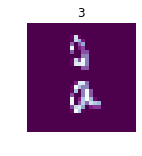

In [4]:
plt.figure(figsize=[2,2])
plot_random_digit()

Execute the cell multiple times to see random examples.  
#### Looking at 50 samples at one go

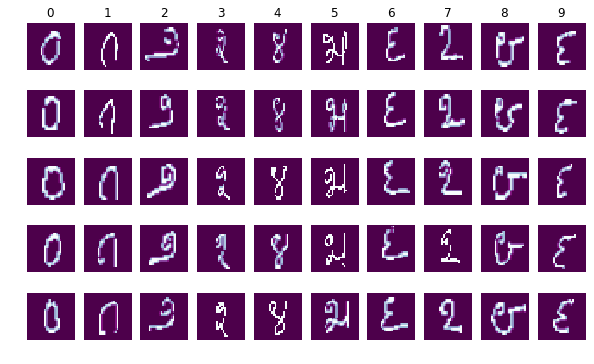

In [5]:
plt.figure(figsize=[10,6])
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.axis('Off')
    if i < 10:
        plt.title(y_train[i])
    plt.imshow(X_train[i], cmap='BuPu_r')

As someone who is not good at reading Kannada script, to me the symbols seem somewhat similar for - 
 - 3 and 7 
 - 6 and 9  

At the onset, I would expect that the predictors could be somewhat confused between these pairs. Although this isn't necessarily true - maybe our model can identify the digits better than I can. 

## Reshaping the datasets for predictive model building

The individual examples are 28 X 28. For most predictive modeling methods in scikit learn, we need to get flatten the examples to a 1D array.  
We'll use the reshape method of numpy arrays.


In [6]:
X_train_reshape = X_train.reshape(X_train.shape[0], 784)
X_test_reshape = X_test.reshape(X_test.shape[0], 784)
X_train_reshape.shape, X_test_reshape.shape

((60000, 784), (10000, 784))

***
## Building and understanding the Logistic regression model

Let's build a Logistic regression model for our multiclass classification problem.   

**Note that we'll not be focusing on getting the best possible performance. Instead, we'll focus on how to understand what the model has learnt. Which is more interesting to assess when the model isn't working extremely well. :) **


A logistic regression model will be easy and interesting to analyse the coefficients to understand what the model has learnt.  
The formulation of a multi-class classification can be done in a couple of ways in SciKit-learn. They are - 

- One vs Rest
- Multinomial

**1. One vs Rest: **  

Also known as one-vs-all, this strategy consists in fitting one classifier per class. For each classifier, the class is fitted against all the other classes. One advantage of this approach is its interpretability.

Since each class is represented by one and one classifier only, it is possible to gain knowledge about the class by inspecting its corresponding classifier. This is the most commonly used strategy for multiclass classification and is a fair default choice.

For our case, it would mean building 10 different classifiers.

Read more about it here:  
https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html


**2. Multinomial: **  

In this strategy, we model the logarithm of the probability of seeing a given output using the linear predictor.  
For `multinomial` the loss minimised is the multinomial loss fit across the entire probability distribution. 
The softmax function is used to find the predicted probability of each class.

Read more about this here:  
https://en.wikipedia.org/wiki/Multinomial_logistic_regression#As_a_log-linear_model  

  
  
**Note**: This distinction is important, and needs you to intrepret the coefficients differently for the models.

### First, let's built our model using the One vs. Rest scheme

In [7]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(solver="liblinear", multi_class="ovr")

# Fitting on first 10000 records for faster training  
lr1.fit(X_train_reshape[:10000], y_train[:10000])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

#### Assessing performance on the train set

The predictions of the model for the training data

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_train_pred = lr1.predict(X_train_reshape[:10000])

Plotting the confusion matrix

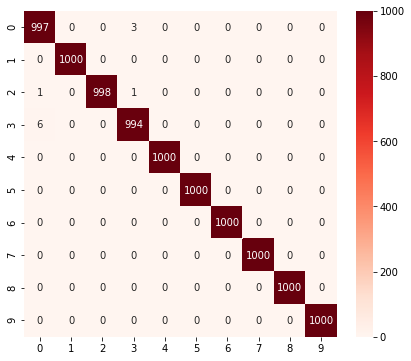

In [9]:
cm = confusion_matrix(y_train[:10000], y_train_pred[:10000])

plt.figure(figsize=[7,6])
sns.heatmap(cm, cmap="Reds", annot=True, fmt='.0f')
plt.show()

In [10]:
print("Accuracy: "+ str(accuracy_score(y_train[:10000], y_train_pred)))
print(classification_report(y_train[:10000], y_train_pred))

Accuracy: 0.9989
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1000
           1       1.00      1.00      1.00      1000
           2       1.00      1.00      1.00      1000
           3       1.00      0.99      0.99      1000
           4       1.00      1.00      1.00      1000
           5       1.00      1.00      1.00      1000
           6       1.00      1.00      1.00      1000
           7       1.00      1.00      1.00      1000
           8       1.00      1.00      1.00      1000
           9       1.00      1.00      1.00      1000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



#### That's VERY high training accuracy! Overfitting?

Also, looks like the model is **NOT** very confused between 3 and 7, 6 and 9, at least not on the train set.

### Error Analysis: Checking out the mis-classified cases
We'll covert to a Pandas series for ease of indexing, isolate the misclassification cases, plot some examples.

In [11]:
y_series = pd.Series(y_train[:10000])
y_miss = y_series[~(y_series==y_train_pred)]
print(y_miss.shape)

(11,)


#### 11 cases were misclassified
- Studying some cases
- Picking 9 random cases - we'll plot the digits, along with the true and predicted labels

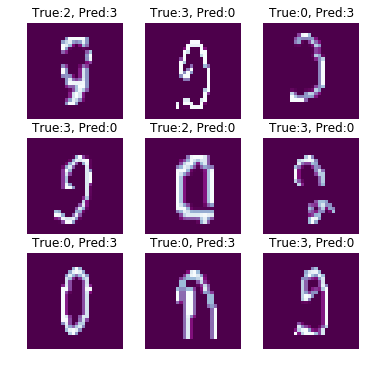

In [12]:
y_miss_samp = y_miss.sample(9)

%matplotlib inline
plt.figure(figsize=[6,6])
for i in range(len(y_miss_samp)):
    plt.subplot(3,3,i+1)
    plt.title("True:"+str(y_miss_samp.values[i])+", Pred:"+str(y_train_pred[y_miss_samp.index][i]))
    plt.imshow(X_train[y_miss_samp.index[i]],cmap='BuPu_r')
    plt.axis('Off')

Can you see why the model was confused?  
Let's see how the model fares on the test set.

#### Confusion matrix on the test set

Making predictions on the test data, and plotting the confusion matrix.

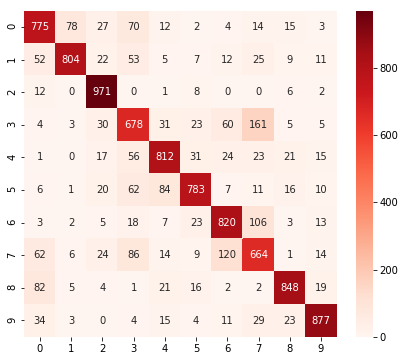

In [13]:
y_test_pred = lr1.predict(X_test_reshape)
cm_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=[7,6])
sns.heatmap(cm_test, cmap="Reds", annot=True, fmt='.0f')
plt.show()

In [14]:
print("Accuracy: "+ str(accuracy_score(y_test, y_test_pred)))
print(classification_report(y_test, y_test_pred))

Accuracy: 0.8032
              precision    recall  f1-score   support

           0       0.75      0.78      0.76      1000
           1       0.89      0.80      0.85      1000
           2       0.87      0.97      0.92      1000
           3       0.66      0.68      0.67      1000
           4       0.81      0.81      0.81      1000
           5       0.86      0.78      0.82      1000
           6       0.77      0.82      0.80      1000
           7       0.64      0.66      0.65      1000
           8       0.90      0.85      0.87      1000
           9       0.91      0.88      0.89      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



#### Looking at the confusion matrix and the classification report -

Recall is least for 3, 7 - model is confused between them significantly. Similarly, there is confusion between 4 and 5. Also, many 0s are mistaken for 1 and 3.

Okay! So it looks like the performance has fallen sharply on the test set. There's a very good chance we're overfitting on the train set.  

We acknowledge that the model could be improved.  

But, let's not worry about that for now. **Let's focus on the way to understand what the model learnt. **
***
## Model interpretation
### Understanding the contribution of each pixel

The coefficients we learnt right now for each pixel, are based on the One vs Rest scheme.  

Let's go ahead and analyze the coefficients for our OVR model.


In [15]:
lr1.coef_.shape

(10, 784)

We have 784 coefficients for each label - coefficients for each pixel.  

A positive coefficient means a high value on that pixel increases the chances of this label, **compared to ALL other classes**. 
The coefficients therefore tell us how this pixel differentiates this label from all the other labels together.

#### Extracting the pixel coefficients and plotting on a heatmap for the label 0

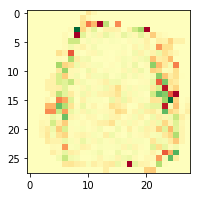

In [16]:
plt.figure(figsize=[3,3])
coefs = lr1.coef_[0].reshape(28,28)
plt.imshow(coefs,cmap="RdYlGn",vmin=-np.max(coefs),vmax=np.max(coefs)) #setting mid point to 0
plt.show()

I've used a divergent colour scheme to differentiate between the positive and negative signs. 

In the image above, pixels with green colour are positive value pixels. The image tells us that values in certain pixels help classify the digit as 0. As expected, the red colour in the center indicates that presence of values in that range means lower chances of the digit being a zero. Yellow is close to 0 - meaning the pixel doesn't help differentiate in any way.

#### Making such pixel heatmaps for all the digits

Text(0.5, 0.98, 'Pixel Heatmap: One-vs-Rest Formulation')

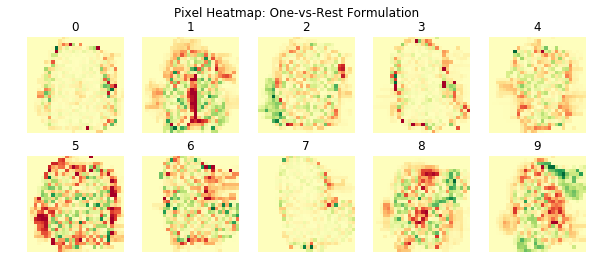

In [17]:
plt.figure(figsize=[10,4])
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(str(i))
    coefs = lr1.coef_[i].reshape(28,28)
    plt.imshow(coefs,cmap="RdYlGn",vmin=-np.max(coefs),vmax=np.max(coefs)) #getting the midpoint to 0
    plt.axis('Off')
plt.suptitle('Pixel Heatmap: One-vs-Rest Formulation')

Have a good look at these heatmaps. This will reveal what the model has learnt.
Be mindful that we have 'One vs. Rest' formulation, especially when comparing with heatmaps of other digits.

## Now, let's build a model using the multinomial scheme.
- We need to specify the `multi_class` parameter as "multinomial"
- The 'liblinear' solver doesn't support this, so we choose the "sag" solver.

In [18]:
lr2 = LogisticRegression(random_state=42, multi_class="multinomial", solver="sag")
lr2.fit(X_train_reshape[:10000], y_train[:10000])

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

#### Assessing performance on the test set
Plotting the confusion matrix

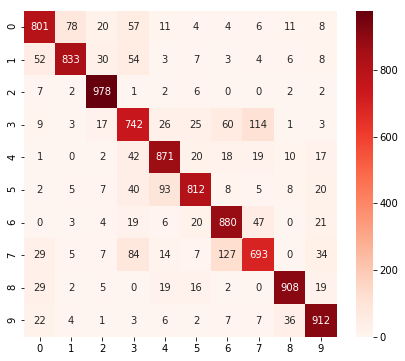

In [19]:
y_test_pred = lr2.predict(X_test_reshape)

cm_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=[7,6])
sns.heatmap(cm_test, cmap="Reds", annot=True, fmt='.0f')
plt.show()

In [20]:
print("Accuracy: " + str(accuracy_score(y_test, y_test_pred)))
print(classification_report(y_test, y_test_pred))

Accuracy: 0.843
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1000
           1       0.89      0.83      0.86      1000
           2       0.91      0.98      0.94      1000
           3       0.71      0.74      0.73      1000
           4       0.83      0.87      0.85      1000
           5       0.88      0.81      0.85      1000
           6       0.79      0.88      0.83      1000
           7       0.77      0.69      0.73      1000
           8       0.92      0.91      0.92      1000
           9       0.87      0.91      0.89      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



### Understanding the contribution of each pixel

We have 784 coefficients for each label - coefficients for each pixel. 

Now, a positive coefficient would mean what makes this label what it is! But, if 3 labels have similar presence in particular pixel, the coefficients for all 3 may have similar values.

#### Extracting the pixel coefficients and plotting on a heatmap for the label 0

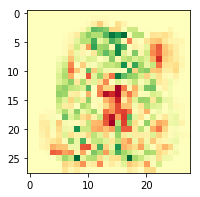

In [21]:
plt.figure(figsize=[3,3])
coefs = lr2.coef_[0].reshape(28,28)
plt.imshow(coefs,cmap="RdYlGn",vmin=-np.max(coefs),vmax=np.max(coefs)) #setting mid point to 0
plt.show()

How different/similar is this to the heatmap from the OVR model?  
Let's make the heatmaps for all pixels.

#### Making such pixel heatmaps for all the digits

Text(0.5, 0.98, 'Pixel Heatmap: Multinomial Formulation')

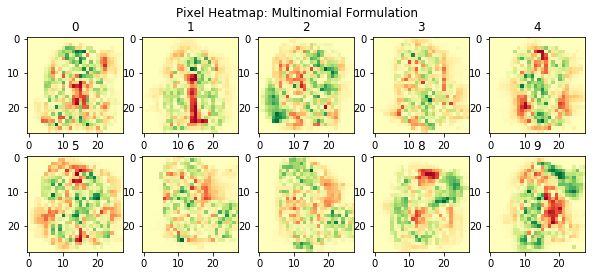

In [22]:
plt.figure(figsize=[10,4])
for i in range(10):
    plt.subplot(2,5,i+1), plt.title(str(i))
    coefs = lr2.coef_[i].reshape(28,28)
    plt.imshow(coefs,cmap="RdYlGn",vmin=-np.max(coefs),vmax=np.max(coefs)) #getting midpoint to 0
plt.suptitle('Pixel Heatmap: Multinomial Formulation')

### How does these heatmaps compare to the mean images for each label?

Text(0.5, 0.98, 'Mean images for each digit')

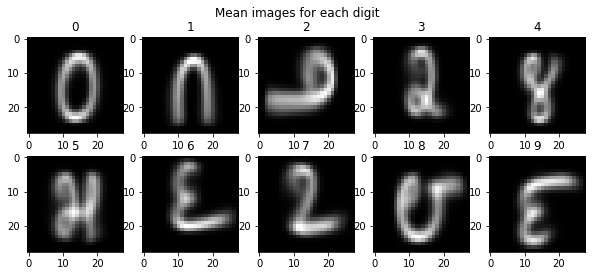

In [23]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2,5,i+1), plt.title(i)
    plt.imshow(np.mean(X_train[y_train==i],axis=0),cmap='gray')
plt.suptitle('Mean images for each digit')

## Plotting them all together - have a good look.

Text(0.5, 0.98, 'Pixel Heatmap: Multinomial Formulation')

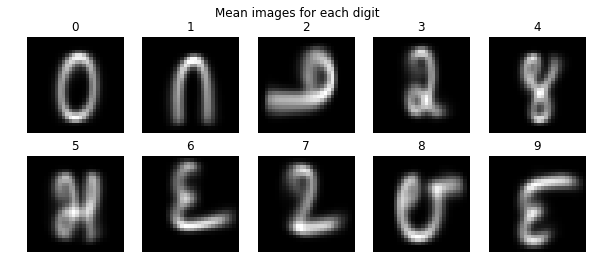

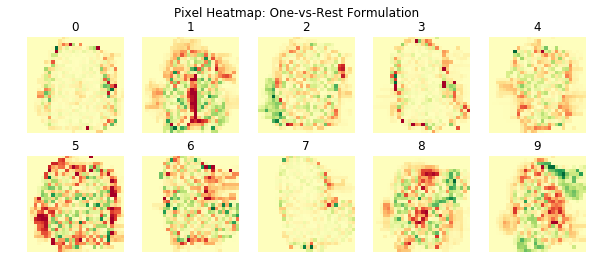

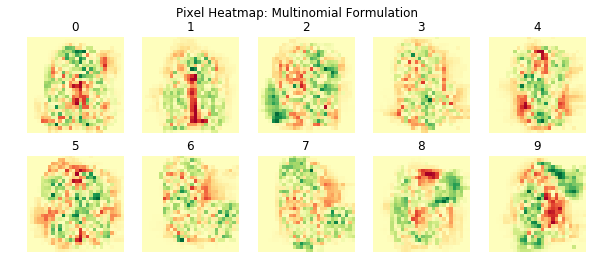

In [24]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2,5,i+1), plt.title(i)
    plt.imshow(np.mean(X_train[y_train==i],axis=0),cmap='gray')
    plt.axis('Off')
plt.suptitle('Mean images for each digit')

plt.figure(figsize=[10,4])
for i in range(10):
    plt.subplot(2,5,i+1), plt.title(str(i))
    coefs = lr1.coef_[i].reshape(28,28)
    plt.imshow(coefs,cmap="RdYlGn",vmin=-np.max(coefs),vmax=np.max(coefs)) #getting the midpoint to 0
    plt.axis('Off')
plt.suptitle('Pixel Heatmap: One-vs-Rest Formulation')

plt.figure(figsize=[10,4])
for i in range(10):
    plt.subplot(2,5,i+1), plt.title(str(i))
    coefs = lr2.coef_[i].reshape(28,28)
    plt.imshow(coefs,cmap="RdYlGn",vmin=-np.max(coefs),vmax=np.max(coefs)) #getting midpoint to 0
    plt.axis('Off')
plt.suptitle('Pixel Heatmap: Multinomial Formulation')



## Exercise - 
You've seen the heatmaps for the OVR method, as well as the multinomial method. And you also have the average image for each label.  

- Compare and contrast the heatmaps with the mean images.
- What do think is going on? Can you try to understand what the models have learnt for each digit? 
- Why are the models not performing so well on certain digits? Can the heatmap help understand?

### Possible next steps for those interesting in trying out more things -

I suggest you try the following - 
1. Use Logistic regression with regularization (ridge, lasso, elasticnet) and hyper-parameter optimization using cross validation to reduce overfitting.
2. Use SVD/PCA to denoise and reconstruct the original data; follow it up with a tuned Logistic regression model.

Well, that's all for our little demo here! I'll soon share more demos with different modeling techniques, ways to interpret them and more experiments with the same dataset with supervised and unsupervised techniques.  



### Found this interesting? Stay tuned for more such demos.


#### Do share your remarks/comments/suggestions!